In [1]:
import pandas as pd
from pybliometrics.scopus import ScopusSearch
from pybliometrics.scopus.utils import config
from pybliometrics.scopus import AuthorRetrieval
from pybliometrics.scopus import AffiliationRetrieval

pd.set_option('display.max_columns', None)
data = pd.read_csv("./data/ai_research_papers.csv")

/home/pkmon1d/miniconda3/lib/python3.11/site-packages/pandas/io/parsers/c_parser_wrapper.py:365: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common_type = np.find_common_type(
/home/pkmon1d/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (2,19,21,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,affiliation_city,affiliation_country,author_count,author_names,author_ids,author_afids,coverDate,coverDisplayDate,publicationName,issn,source_id,eIssn,aggregationType,volume,issueIdentifier,article_number,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor,origin_ref,best_yn,year
0,2-s2.0-0030354250,NaN,NaN,NaN,Novel application of theory refinement to stud...,cp,Conference Paper,Baffes P.,60092463,"SciComp Inc., Texas",Austin,United States,2.0,"Baffes, Paul T.;Mooney, Raymond J.",6508335676;7102791999,60092463;60092463,1996-12-01,1996,Proceedings of the National Conference on Arti...,NaN,78337,NaN,Conference Proceeding,1,NaN,NaN,403-408,Theory refinement systems developed in machine...,NaN,24,0,NaN,NaN,NaN,undefined,NaN,AAAI Artificial Intelligence,1,1996
1,2-s2.0-0029736257,NaN,NaN,NaN,Algorithm for multicast tree generation in net...,cp,Conference Paper,Ramanathan S.,60011761,BBN Technologies,Cambridge,United States,1.0,"Ramanathan, S.",7102449182,60011761,1996-01-01,1996,Proceedings - IEEE INFOCOM,0743166X,18204,NaN,Conference Proceeding,1,NaN,NaN,337-344,We formulate the problem of multicast tree gen...,NaN,13,0,NaN,NaN,NaN,undefined,NaN,INFOCOM Networking,1,1996
2,2-s2.0-85088074507,10.1145/238721.238734,NaN,NaN,Automatic compiler-inserted I/O prefetching fo...,cp,Conference Paper,Mowry T.C.,60016849,University of Toronto,Toronto,Canada,3.0,"Mowry, Tödd C.;Demke, Angela K.;Krieger, Orran",7003819429;57212549974;57207594975,60016849;60016849;60016849,1996-01-01,1996,2nd USENIX Symposium on Operating Systems Desi...,NaN,21100940296,NaN,Conference Proceeding,NaN,NaN,NaN,NaN,Current operating systems offer poor performan...,NaN,135,0,NaN,NaN,NaN,undefined,NaN,OSDI Operating Systems,1,1996
3,2-s2.0-85085698525,10.1145/233013.233019,NaN,NaN,Exploiting process lifetime distributions for ...,cp,Conference Paper,Harchol-Balter M.,60025038,"University of California, Berkeley",Berkeley,United States,2.0,"Harchol-Balter, Mor;Downey, Allen B.",6701569542;35858860300,60025038;60025038,1996-05-15,15 May 1996,SIGMETRICS 1996 - Proceedings of the 1996 ACM ...,NaN,21101098721,NaN,Conference Proceeding,NaN,NaN,NaN,13-24,We measure the distribution of lifetimes for U...,NaN,19,1,publisherfree2read,Bronze,NSF,DMW-891 9074,National Science Foundation,SIGMETRICS Performance,1,1996
4,2-s2.0-0030157475,10.1145/235968.233333,NaN,NaN,Implementing Data Cubes Efficiently,ar,Article,Harinarayan V.,60012708,Stanford University,Stanford,United States,3.0,"Harinarayan, Venky;Rajaraman, Anand;Ullman, Je...",6506991255;7003282591;7004490091,60012708;60012708;60012708,1996-01-01,June 1996,SIGMOD Record (ACM Special Interest Group on M...,01635808,13622,NaN,Journal,25,2,NaN,205-216,Decision support applications involve complex ...,NaN,990,0,NaN,NaN,NaN,undefined,NaN,SIGMOD Databases,1,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270859,2-s2.0-85163705925,10.1145/3578338.3593549,NaN,NaN,Leveraging the Properties of mmWave Signals fo...,cp,Conference Paper,Liu Y.,60018179;60001439,University of South Carolina;Pennsylvania Stat...,Columbia;University Park,United States;United States,4.0,"Liu, Yilin;Zhang, Shijia;Gowda, Mahanth;Nelaku...",57218456029;57224191250;56368104500;6603154405,60001439;60001439;60001439;60018179,2023-06-19,19 June 2023,SIGMETRICS 2023 - Abstract Proceedings of the ...,NaN,21101162612,NaN,Conference Proceeding,NaN,NaN,NaN,107-108,"Wireless signals, which are mainly used for co...",finger tracking | iot | mmwave sensing | wirel...,0,0,NaN,NaN,NaN,undefined,NaN,SIGMETRICS Performance,0,2023
270860,2-s2.0-85163702927,10.1145/3578338.3593577,NaN,NaN,Towards Accelerating Data Intensive Applicatio...,cp,Conference Paper,Lin J.,60033010;60032179;60013372,Intel Corporation;University of

In [3]:
data.groupby('origin_ref').count().reset_index()[['origin_ref', 'eid']].sort_values('eid', ascending= False)

,origin_ref,eid
9,ICSE Software Engineering,30065
7,ICCV Computer Vision,20809
2,CHI Human-Computer Interaction,19988
0,AAAI Artificial Intelligence,18167
4,CVPR Computer Vision,17351
16,NeurIPS Machine Learning,15440
28,STOC Theory,14296
1,ACL Natural Language Processing,13547
8,ICML Machine Learning,10877
3,CIKM Knowledge Management,10527


/home/pkmon1d/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


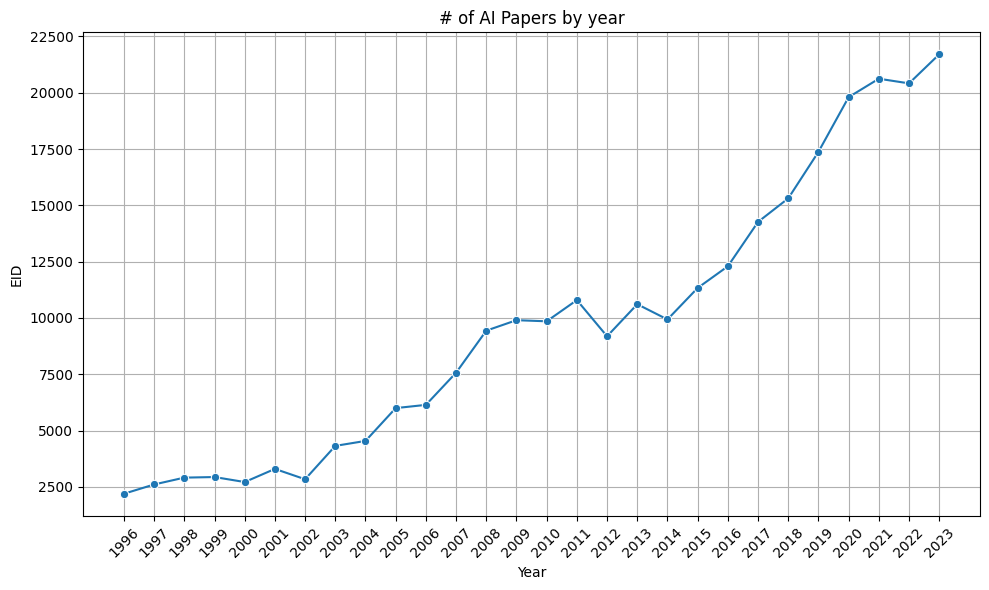

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df1 = data.groupby('year').count().reset_index()[['year', 'eid']].sort_values('year')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='year', y='eid', marker='o')
plt.title('# of AI Papers by year')
plt.xlabel('Year')
plt.ylabel('EID')
plt.grid(True)
plt.xticks(df1['year'], rotation=45)  # Rotate year labels for better visibility
plt.tight_layout()
plt.show()

In [10]:
data['author_count'] = data['author_count'].fillna(0).astype(int)
print("논문 별 평균 저자 수",data['author_count'].mean())

df_exploded = data.assign(affiliation_country=data['affiliation_country'].str.split(';')).explode('affiliation_country')
print("논문 별 평균 공동 작업 국가 수", df_exploded.groupby('eid')['affiliation_country'].nunique().mean())

논문 별 평균 저자 수 3.677997076023392
논문 별 평균 공동 작업 국가 수 1.353431980624963


In [20]:
df3

,author_count,eid
0,1,19827
1,2,60138
2,3,67882
3,4,51730
4,5,31846
5,6,19191
6,7,9498
7,8,4956
8,9,2424
9,10,1341


/tmp/ipykernel_440102/3033370905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=df3, x='author_count', y='eid', palette='coolwarm')
/home/pkmon1d/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


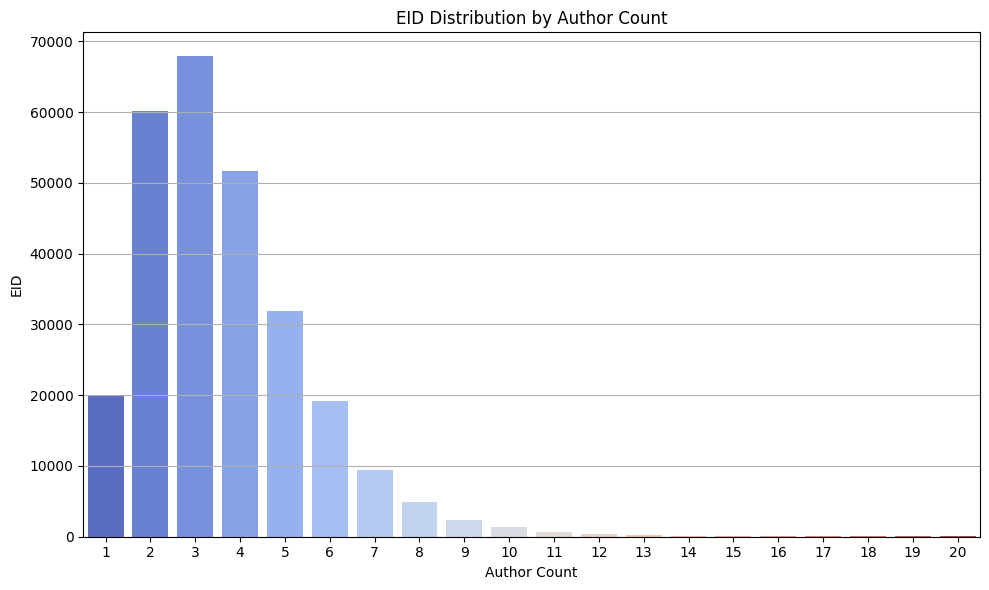

In [21]:
df3 = data.groupby("author_count").count().reset_index()[['author_count','eid']].sort_values('author_count').head(20)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df3, x='author_count', y='eid', palette='coolwarm')
plt.title('EID Distribution by Author Count')
plt.xlabel('Author Count')
plt.ylabel('EID')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [11]:
data.groupby('origin_ref')['eid'].count().reset_index().sort_values('origin_ref')

,origin_ref,eid
0,AAAI Artificial Intelligence,18167
1,ACL Natural Language Processing,13547
2,CHI Human-Computer Interaction,19988
3,CIKM Knowledge Management,10527
4,CVPR Computer Vision,17351
5,FOCS Theory,4377
6,FSE Software Engineering,2326
7,ICCV Computer Vision,20809
8,ICML Machine Learning,10877
9,ICSE Software Engineering,30065


/tmp/ipykernel_440102/2220732977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=df2, x='eid', y='affiliation_country', palette='viridis')
/home/pkmon1d/miniconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


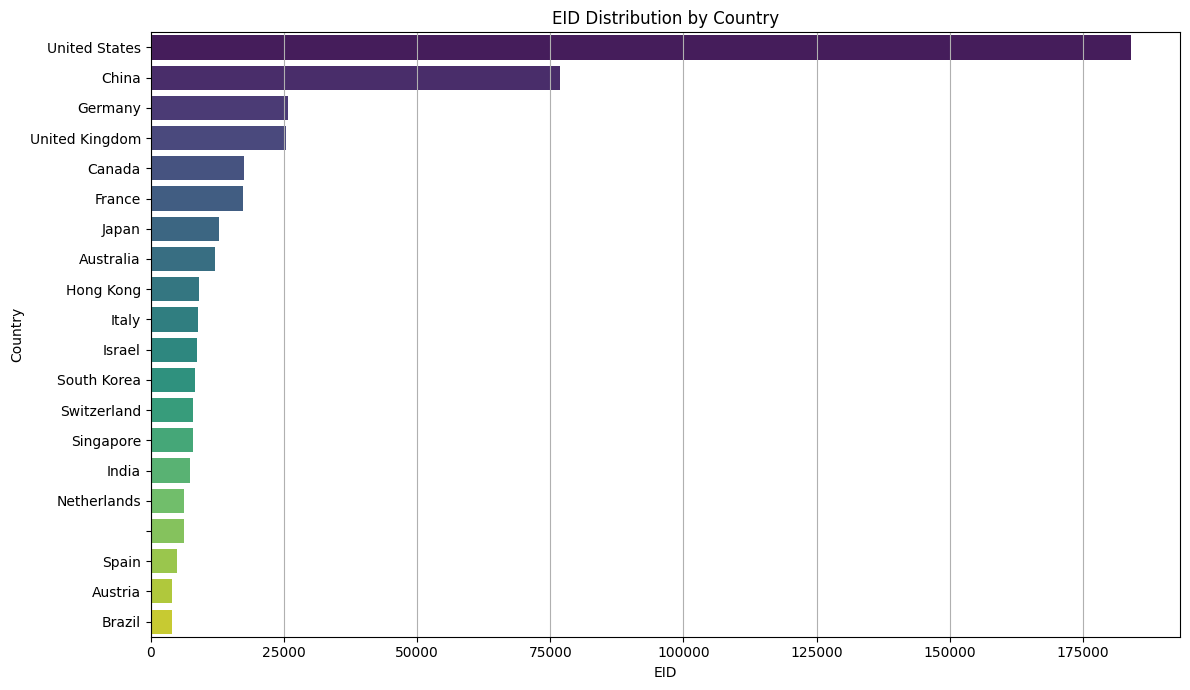

In [12]:
# Plotting a bar plot with seaborn
df2 = df_exploded.groupby("affiliation_country")['eid'].count().reset_index().sort_values('eid', ascending= False).head(20)
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(data=df2, x='eid', y='affiliation_country', palette='viridis')
plt.title('EID Distribution by Country')
plt.xlabel('EID')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()